In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from typing import Dict
import pandas as pd
import numpy as np
import os

In [11]:
DATASET_FOLDER = './dataset/'
TRAIN_FILE = 'train.csv'
IMAGE_FOLDER = "./imgs/"

In [12]:
trainData = pd.read_csv(os.path.join(DATASET_FOLDER, TRAIN_FILE))

In [13]:
print(trainData.columns)
trainData.head()

Index(['image_link', 'group_id', 'entity_name', 'entity_value'], dtype='object')


,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516,item_weight,0.709 gram
3,https://m.media-amazon.com/images/I/612mrlqiI4...,459516,item_weight,0.709 gram
4,https://m.media-amazon.com/images/I/617Tl40LOX...,731432,item_weight,1400 milligram


In [14]:
trainData['datapoint_id'] = trainData.index

## Assigning Images an ID

In [15]:
imageMap : Dict[str, int] = { image : id for id, image in enumerate(trainData['image_link'].unique()) }
trainData['image_id'] = trainData['image_link'].map(lambda x : imageMap.get(x, -1))

In [16]:
from src.image import Image

c:\Users\Jai Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [17]:
index = 75350
sampleImage = Image(trainData['image_link'][index], trainData['image_id'][index])

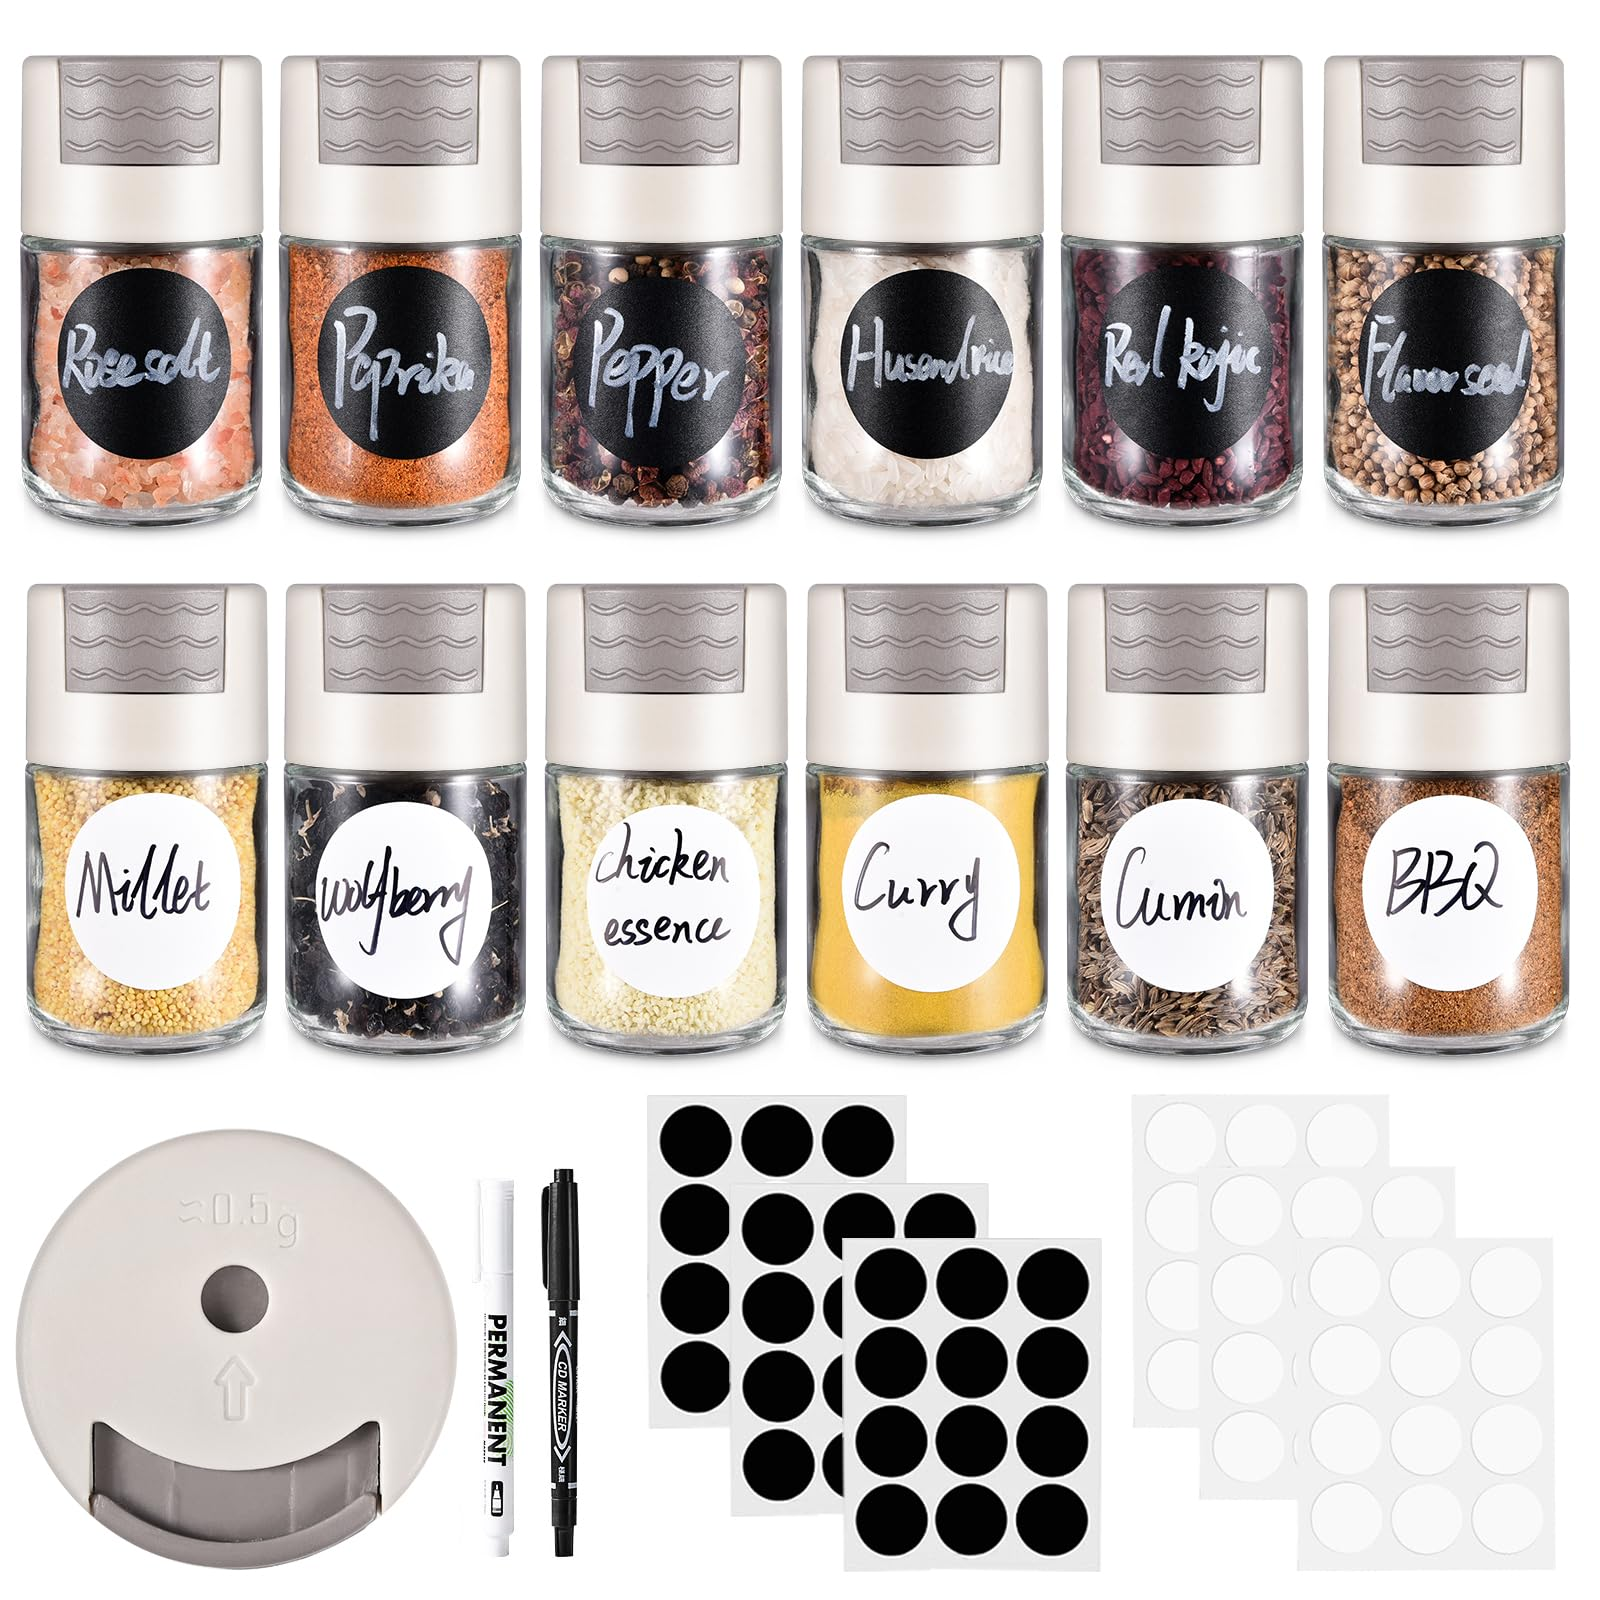

In [18]:
sampleImage.getImage()

In [19]:
print(sampleImage.readTextFrom())

Reahl Huer Rlbj" hwdl
(pa)
Iner 
Chicken
Millek Cuwd PYz
(umih
Wlbrd
essenk
g
1
4
